<a href="https://colab.research.google.com/github/Laxmi-Prajapati/Synapse_LP/blob/Week_4/SynapseLP_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
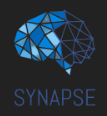

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [145]:
#write code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/My Drive/Synapse/titanic/train.csv')
train

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [146]:
test = pd.read_csv('/content/drive/My Drive/Synapse/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [147]:
# try researching about regex
import re
train['Name']
pattern = r", ([A-Z]\w{1,3}.)"
train['Title'] = train['Name'].str.extract(pattern)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [148]:
#write code here
train.drop(['PassengerId','Ticket','Name'], axis = 1, inplace = True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss.
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,Rev.
887,1,1,female,19.0,0,0,30.0000,B42,S,Miss.
888,0,3,female,NaN,1,2,23.4500,NaN,S,Miss.
889,1,1,male,26.0,0,0,30.0000,C148,C,Mr.


### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [149]:
#write code here

nan = train.isna().sum()
percent = (nan/train.shape[0])*100
percent = pd.DataFrame(percent)
todrop = percent[0] > 50
train = train.loc[:, ~todrop]
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev.
887,1,1,female,19.0,0,0,30.0000,S,Miss.
888,0,3,female,NaN,1,2,23.4500,S,Miss.
889,1,1,male,26.0,0,0,30.0000,C,Mr.


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [150]:
#write code here
embkmode = train['Embarked'].mode()
train['Embarked'].fillna(embkmode, inplace = True)
agemean = train['Age'].mean()
train['Age'].fillna(agemean, inplace = True)
train

<ipython-input-150-d341c5ec5e80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked'].fillna(embkmode, inplace = True)
<ipython-input-150-d341c5ec5e80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'].fillna(agemean, inplace = True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr.
1,1,1,female,38.000000,1,0,71.2833,C,Mrs.
2,1,3,female,26.000000,0,0,7.9250,S,Miss.
3,1,1,female,35.000000,1,0,53.1000,S,Mrs.
4,0,3,male,35.000000,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev.
887,1,1,female,19.000000,0,0,30.0000,S,Miss.
888,0,3,female,29.699118,1,2,23.4500,S,Miss.
889,1,1,male,26.000000,0,0,30.0000,C,Mr.


### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [151]:
#write code here
train['Family_members'] = train['SibSp'] + train['Parch']
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,22.000000,1,0,7.2500,S,Mr.,1
1,1,1,female,38.000000,1,0,71.2833,C,Mrs.,1
2,1,3,female,26.000000,0,0,7.9250,S,Miss.,0
3,1,1,female,35.000000,1,0,53.1000,S,Mrs.,1
4,0,3,male,35.000000,0,0,8.0500,S,Mr.,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev.,0
887,1,1,female,19.000000,0,0,30.0000,S,Miss.,0
888,0,3,female,29.699118,1,2,23.4500,S,Miss.,3
889,1,1,male,26.000000,0,0,30.0000,C,Mr.,0


In [152]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm = train[['Age','Fare','Family_members']]
train[['Age','Fare','Family_members']] = scaler.fit_transform(norm)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,0.271174,1,0,0.014151,S,Mr.,0.1
1,1,1,female,0.472229,1,0,0.139136,C,Mrs.,0.1
2,1,3,female,0.321438,0,0,0.015469,S,Miss.,0.0
3,1,1,female,0.434531,1,0,0.103644,S,Mrs.,0.1
4,0,3,male,0.434531,0,0,0.015713,S,Mr.,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,0.025374,S,Rev.,0.0
887,1,1,female,0.233476,0,0,0.058556,S,Miss.,0.0
888,0,3,female,0.367921,1,2,0.045771,S,Miss.,0.3
889,1,1,male,0.321438,0,0,0.058556,C,Mr.,0.0


In [153]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
train = pd.get_dummies(train, columns = ['Pclass','Sex','Title','Embarked'])
train

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,1,0,0.139136,0.1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0,0,0.015469,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,1,0,0.103644,0.1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0,0,0.058556,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,1,2,0.045771,0.3,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0,0,0.058556,0.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [154]:
#write code here
y = pd.DataFrame(train['Survived'], columns = ["Survived"])
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


<b>remove the y_label (survived) from the dataframe</b>

In [155]:
#write code here
train.drop(y, axis = 1, inplace = True)
train

,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,1,0,0.014151,0.1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0.472229,1,0,0.139136,0.1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0.321438,0,0,0.015469,0.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.434531,1,0,0.103644,0.1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0.434531,0,0,0.015713,0.0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0,0,0.025374,0.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
887,0.233476,0,0,0.058556,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
888,0.367921,1,2,0.045771,0.3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
889,0.321438,0,0,0.058556,0.0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [156]:
#write code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,y, test_size = 0.3, random_state = 42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [157]:
#write code here
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42, max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

<b>Print the Model Accuracy</b>

In [158]:
#write code here
dt.score(X_test, y_test)

0.8283582089552238

## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:
#### Medical Diagnosis:
Decision Trees use the medical history, symptoms, test results, age and other patient data to diagnose a disease and suggest appropriate treatment for the patient.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

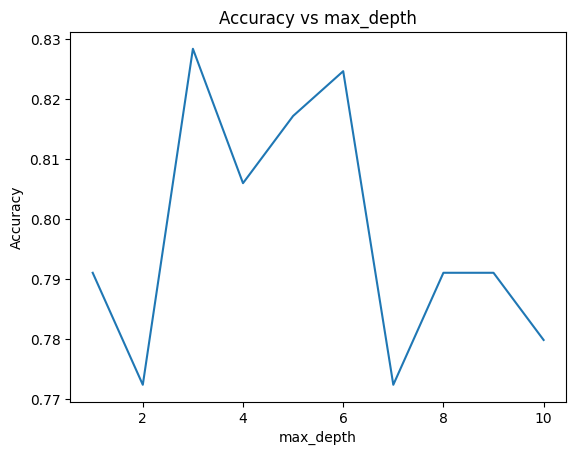

In [159]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
import matplotlib.pyplot as plt
acc = []
acc_train1 = []
for i in range(1,11):
  dt = DecisionTreeClassifier(random_state = 42, max_depth = i)
  dt.fit(X_train,y_train)
  acc_train = dt.score(X_train, y_train)
  acc_train1.append(acc_train)
  acc1 = dt.score(X_test, y_test)
  acc.append(acc1)

plt.plot(range(1,11), acc)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth')
plt.show()

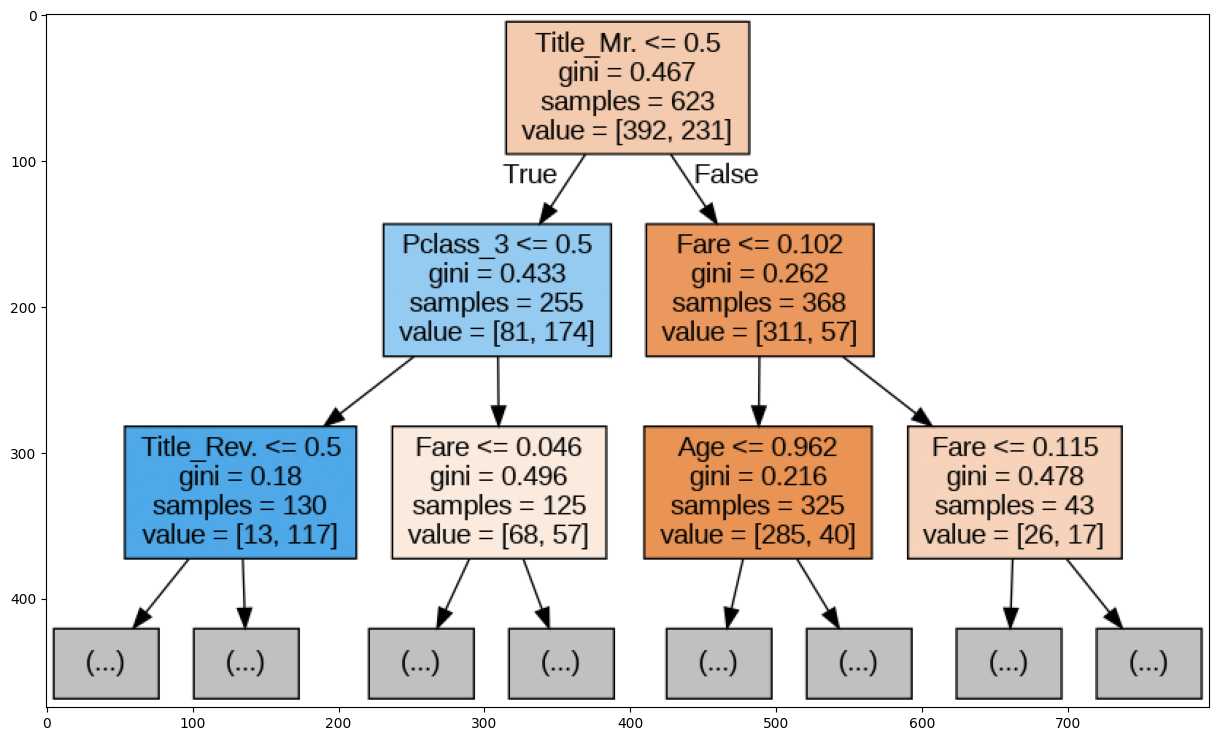

In [160]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [161]:
#write code here
print(f"Train accuracy = {acc_train1}")
print(f"Test Accuracy = {acc}")

Train accuracy = [0.7784911717495987, 0.7961476725521669, 0.8394863563402889, 0.8539325842696629, 0.8587479935794543, 0.869983948635634, 0.8940609951845907, 0.9101123595505618, 0.9261637239165329, 0.942215088282504]
Test Accuracy = [0.7910447761194029, 0.7723880597014925, 0.8283582089552238, 0.8059701492537313, 0.8171641791044776, 0.8246268656716418, 0.7723880597014925, 0.7910447761194029, 0.7910447761194029, 0.7798507462686567]


## Explain: What is your understanding of the charts you made above?

Ans: In the chart above, Title is taken as the main basis of classification by considering it as the root node. The data is classified based on whether the Title_Mr. is True or not. Further the classification is based on the features like Pclass and Fare and so on. The decision tree classsifies the data based on the various features available.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [162]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8022388059701493

## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans: Decision Tree Classifier uses tree like structues to classify the values based on the features that are the nodes of the trees

Naive Bayes works on the Bayes theorem which uses conditional probability for the classification.

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [170]:
#write code here
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

<ipython-input-170-129f99eb90ba>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.8022388059701493

## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans: Random Forest is an ensemble technique which uses multiple decision trees. If the RandomForest is not properly tuned, like the n_estimators are too low or the parameter values are left to default, the decision tree and Random Forest have the same accuracy.

## Extra - BaggingClassifier

In [164]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start=10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,7]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}

rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_params_)

from sklearn.ensemble import BaggingClassifier
b = BaggingClassifier()
b.fit(X_train, y_train)
b.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: Fut

{'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 56}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7835820895522388

In [165]:
print(rf_grid.best_params_)

{'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 56}


In [166]:
rf1 = RandomForestClassifier(bootstrap = False, max_depth = 7, max_features = 'sqrt', min_samples_leaf= 2, min_samples_split = 2, n_estimators = 48)
rf1.fit(X_train, y_train)
rf1.score(X_test, y_test)

<ipython-input-166-fa6058a7f047>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)


0.8171641791044776

## Explain: What is the difference between Random Forest and Bagging Classifier

Ans: Random Forest and Bagging are both ensemble learning techniques.

Random forest is an ensemble technique that uses multiple decision trees and combines their predictions. Decision trees are the base models for Random Forest. Each Decision Tree is trained on a random subset of data. Bagging Classifier is not based on a single base model but supports multiple models. Bagging classifier may or may not use feature aubspace sampling.

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [167]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
ab = AdaBoostClassifier(n_estimators = 100, random_state = 42)
ab.fit(X_train, y_train)
ab.score(X_test, y_test)
score = cross_val_score(ab, X_train, y_train, cv=5)
score

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

array([0.792     , 0.872     , 0.784     , 0.82258065, 0.82258065])

## Explain: What is the difference between Bagging and Boosting?

Ans: Bagging is an ensemble technique which uses multiple base models each of which is trained independently on random subsets of the training data. Base models are trained in parallel in case of bagging and the predictions are usually combined from the base model using majority voting.

Boosting builds a sequence of base models. Each successive model is trained on the data that the previous model failed to classify giving higher weights to the instances that were misclassified. Base models have different weights and their weights are combined through a weighted voting scheme.

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [168]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
dt1 = DecisionTreeClassifier()
param_grid = {'max_depth' : range(2,10), 'min_samples_split' : range(2,5),  'min_samples_leaf' : range(2,5)}
dt1_grid = GridSearchCV(estimator = dt1, param_grid = param_grid, cv = 3)
dt1_grid.fit(X_train, y_train)
print(dt1_grid.best_estimator_)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4)


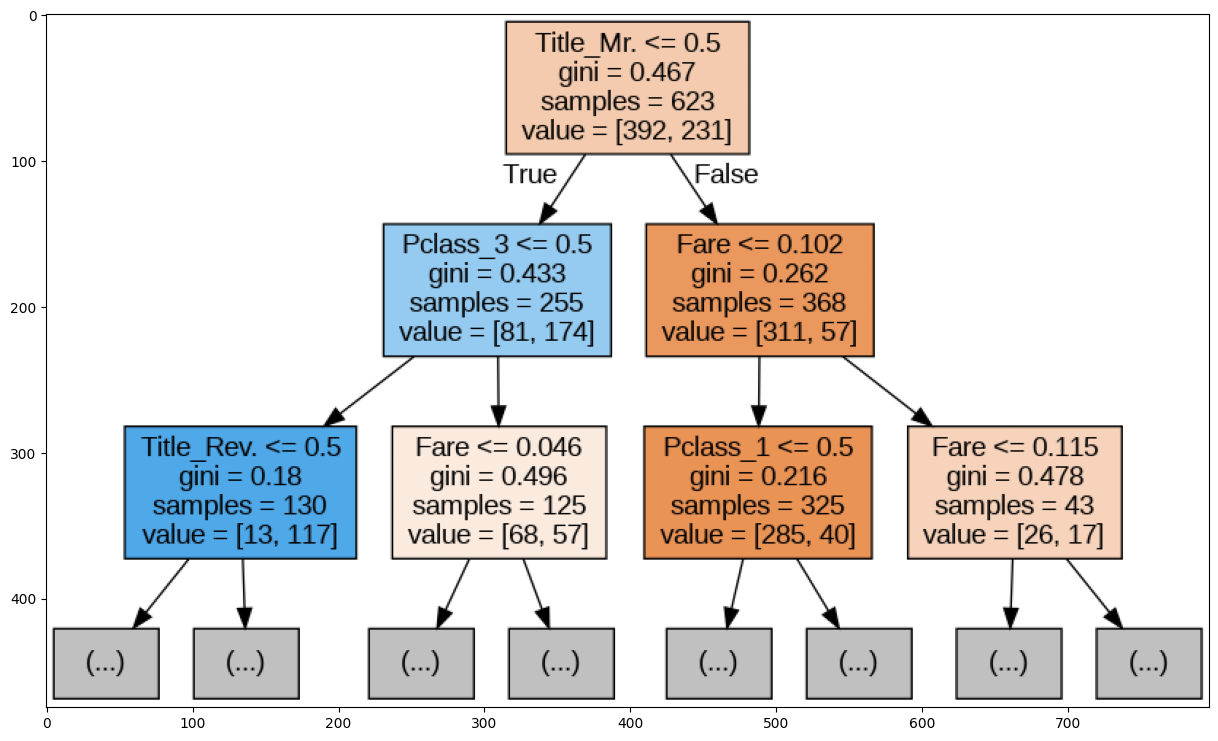

In [169]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
ecision_tree = tree.export_graphviz(dt1_grid.best_estimator_, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans: The best accuracy was given by the Decision Tree Classifier and its accuracy can be further improved by using the various ensemble techniques.


# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)


**Introduction**

XG Boost also known as Extreme Gradient Boosting is the most widely used Machine Learning Algorithm, whether the problem is for classification or regression. It is known for its high performance compared to the other models.  It works well with large, complicated datasets by using various optimization methods.

**Features:**
1. Regularization: Regularization is a technique that is used to get rid of overfitting of the model.

2. Cross-Validation is used by importing it from sklearn but it comes inbuilt with XG Boost.

3. Missing Value:  
It is designed in such a way that it can handle missing values. It finds out the trends in the missing values and apprehends them.

4. Flexibility:
It gives the support to objective functions. They are the function used to evaluate the performance of the model and also it can handle the user-defined validation metrics.

5. Save and load:
It gives the power to save the data matrix and reload afterwards that saves the resources and time.

**Algorithm Working**

In the training, an initial prediction is made. Residuals are made based on the predicted and the observed values. A decision tree is created with the residuals using a similarity score for residuals. Similarity of data in the leaf is calculated along with the gain in similarity in the subsequent split.  The gains are compared to determine a feature and a threshold for a node and the output is calculated using the residuals for each leaf. For classification, the values are typically calculated using the log of odds and probabilities. The output of the tree becomes the new residual for the dataset, which is used to construct another tree. This process is repeated until the residuals stop reducing or for a specified number of times. Each subsequent tree learns from the previous trees and is not assigned equal weight, unlike how Random Forest works. To use this model for prediction, the output from each tree multiplied by a learning rate is added to the initial prediction to arrive at a final value or classification.

**Conclusion**
XG Boost is a versatile tool used in the various fields of Machine Learning. It is a widely used algorithm that saves time as well as resources.






# **End of Task**

> ©DJS Synapse 2023 - 2024